<a href="https://colab.research.google.com/github/LucasMelvin15/Pytorch_deeplearning/blob/main/04_Custom_datasets_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is a custom dataset

Custom datasets are collection of data relating to a specific problem you are working on. ie food dataset the classifies different types of food.

## 0. Importing PyTorch and setting up device agnostic code

In [1]:
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

In [2]:
#set up device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get data
Our data is a subset of the Food101 dataset

Food101 dataset comprises 101 diffrent classes of food images with 1000 images per class (750 training, 250 testing)

Our dataset will comprise 3 classes of food and only 10% of images (75 training and 25 testing)

In [3]:
import requests
import zipfile
from pathlib import Path

# set up the path to the data folder
data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesnt exist, download it and prepare it
if image_path.is_dir():
  print(f"{image_path} directory already exists.... skipping download")
else:
  print(f"{image_path} directory does not exist, creating one....")
  image_path.mkdir(parents=True, exist_ok=True)


# download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:

  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data ...")
  f.write(request.content)


# unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipping pizza, steak, sushi data ....")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory does not exist, creating one....
unzipping pizza, steak, sushi data ....


In [4]:
image_path

PosixPath('data/pizza_steak_sushi')

## 2. Data preparation and data exploration - (Walking through the data)



In [5]:
import os

def walk_through_dir(dir_path):
  """walk through dir_path returning all its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}')")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi')
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test')
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak')
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi')
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza')
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train')
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak')
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi')
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza')


In [7]:
# setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

###2.1 Visualize an image

1. Get all the image paths using `pathlib.Path.glob()` to find all images ending in `.jpg`
2. Pick a random image path using python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem()`
4. Open the images using `PIL.Image.open()` - PIL - Python Image Library
5. Show the image and then print some metadata

Random image path: data/pizza_steak_sushi/train/steak/1961025.jpg
Image class: steak
Image height: 512
Image width: 512


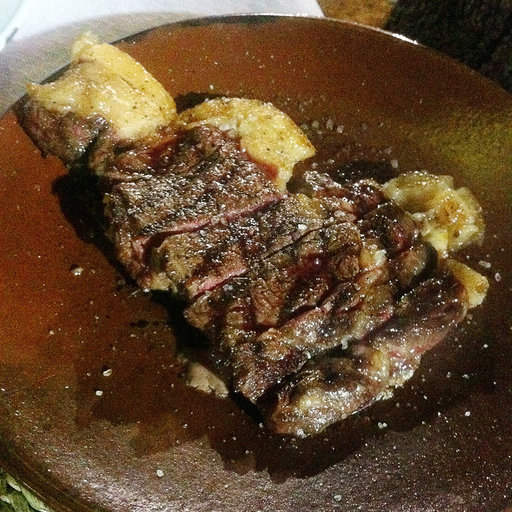

In [8]:
import random
from PIL import Image
from pathlib import Path

#set seed
#random.seed(42)

# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get a random image path
random_image_path = random.choice(image_path_list)


# 3. Get image class from the path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem


# 4. Open image
img = Image.open(random_image_path)

# 5.print metatdata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


(-0.5, 511.5, 511.5, -0.5)

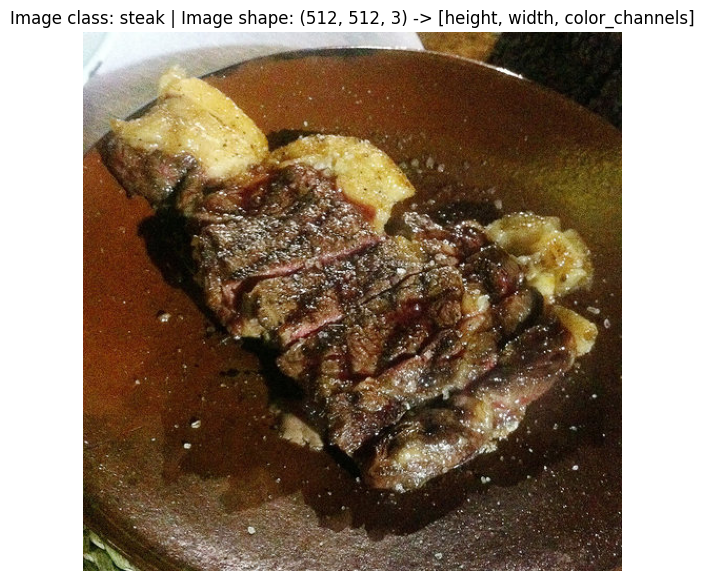

In [9]:
#image visualization with matplot lib

import numpy as np
import matplotlib.pyplot as plt

#turn the image into an array
img_as_array = np.asarray(img)

#plot image with matplot lib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

array([[[221, 236, 239],
        [228, 243, 246],
        [236, 250, 253],
        ...,
        [ 30,  31,  13],
        [ 24,  21,   4],
        [ 36,  31,  12]],

       [[230, 245, 248],
        [234, 248, 251],
        [235, 249, 252],
        ...,
        [ 26,  25,   7],
        [ 33,  28,   9],
        [ 35,  30,  11]],

       [[234, 248, 251],
        [232, 246, 249],
        [229, 243, 246],
        ...,
        [ 33,  27,  11],
        [ 45,  38,  20],
        [ 34,  27,   9]],

       ...,

       [[ 41,  48,  14],
        [ 32,  38,   2],
        [ 34,  40,   2],
        ...,
        [113,  79,  54],
        [ 94,  60,  35],
        [ 85,  49,  25]],

       [[ 63,  70,  26],
        [ 56,  63,  19],
        [ 64,  71,  29],
        ...,
        [113,  76,  49],
        [117,  80,  54],
        [125,  85,  60]],

       [[ 58,  66,  15],
        [ 76,  84,  35],
        [ 46,  52,   6],
        ...,
        [ 96,  57,  28],
        [100,  60,  35],
        [ 91,  49,  25]]], dtype=uint8)
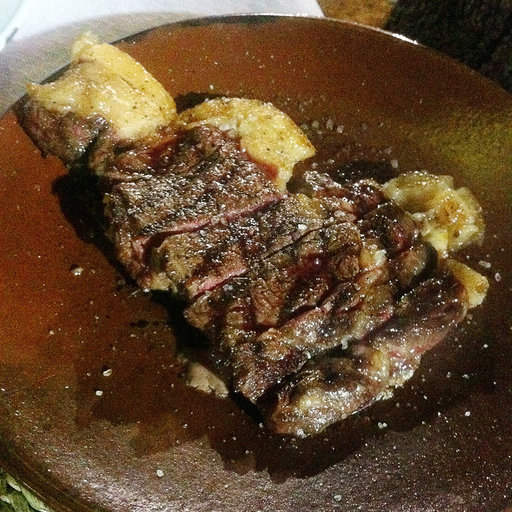

In [10]:
img_as_array

## 3. Transforming data
1. Turn the data target into tensors
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader` - we'll create both Dataset and DataLoader


In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

### 3.1. Transforming data with `torchvision.transforms`

Transforms help you get your images ready to be used with a model/perform data augmentation.

In [12]:
#write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly to the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()

])

In [13]:
data_transform(img).shape

torch.Size([3, 64, 64])

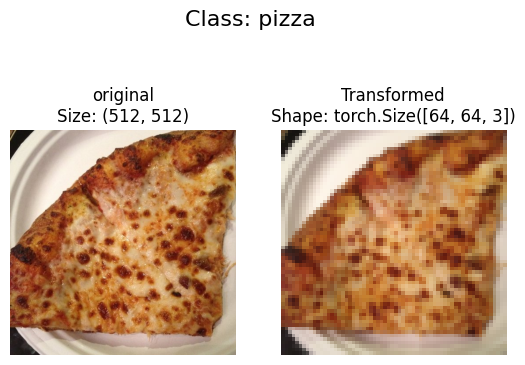

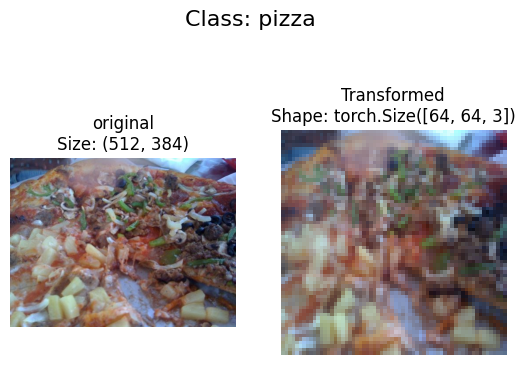

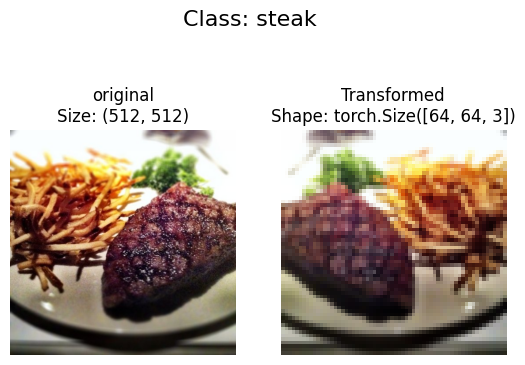

In [14]:
def  plot_transformed_image(image_paths: list, transform, n=3, seed=None):
  """
  selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"original\nSize: {f.size}")
      ax[0].axis(False)

      #transform and plot target image
      transformed_image = transform(f).permute(1,2,0)
      #pytorch default image size[C,H,W]
      #matplot lib image shape[H,W,C] hence use permute to change the order
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_image(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=None)


In [15]:
image_path

PosixPath('data/pizza_steak_sushi')

In [16]:
image_path_list

[PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1302563.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1627703.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_su

## 4. Option 1: Loading image data using `ImageFolder`

`We can load image classification data using torchvision.datasets.ImageFolder` -
 https://pytorch.org/vision/0.18/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder

In [17]:
from torchvision import datasets
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,

)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
#get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [19]:
#get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
# length of data
len(train_data), len(test_data)

(225, 75)

In [21]:
#see samples
train_data.samples[224]

('data/pizza_steak_sushi/train/sushi/93139.jpg', 2)

In [22]:
# index on the train_data Dataset to get a single image and label
img, label = train_data[0][0] , train_data[0][1]
print(f"Image tensor: \n{img}")
print(f"image shape: {img.shape}")
print(f"image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f" Label datatype: {type(label)}")


Image tensor: 
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

In [23]:
class_names[label]

'pizza'

Original shape: torch.Size([3, 64, 64]) ->[color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) ->[height, width, color_channels]


Text(0.5, 1.0, 'pizza')

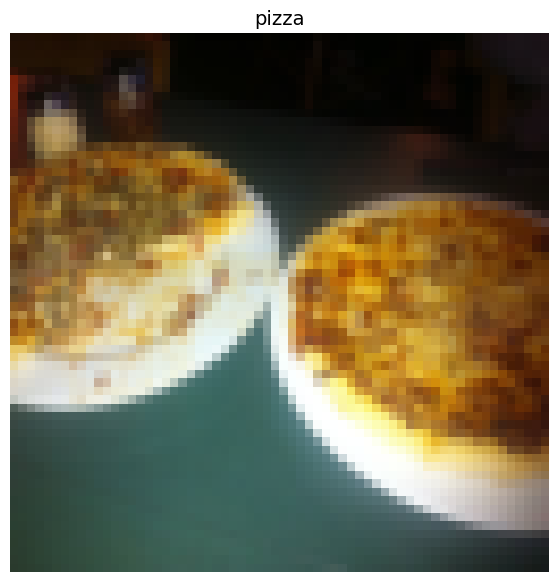

In [24]:
# rearrange the order dimensions
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"Original shape: {img.shape} ->[color_channels, height, width]")
print(f"Image permute: {img_permute.shape} ->[height, width, color_channels]")

#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute )
plt.axis(False)
plt.title(class_names[label], fontsize=14)


### 4.1 Turn loaded images into `DataLoaders`

Dataloaders turns our `dataset` into iterables and we can customoze the batchsize

In [25]:
import os
os.cpu_count()

2

In [26]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE,# how many samples per batch?
    num_workers=1 ,
    shuffle=True # shuffle data every epoch?
)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f62a048ae60>,
 <torch.utils.data.dataloader.DataLoader at 0x7f62a0489f90>)

In [27]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [28]:
img, label = next(iter(train_dataloader))

print(f" Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}") #gives the batch size


 Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5.Option 2: Loading Image data with a Custom `Dataset`
What if a pre-built `Dataset` creator like `torch.vision.datasets.ImageLoader` did not exist ? Well you can build your own

To see this in action, let's work towards replicating `torchvision.datasets.ImageFolder()` by subclassing `torch.utils.data.Dataset` (the base class for all Dataset's in PyTorch).

Python's `os` for dealing with directories (our data is stored in directories).
Python's `pathlib` for dealing with filepaths (each of our images has a unique filepath).
`torch` for all things PyTorch.
PIL's `Image` class for loading images.
`torch.utils.data.Dataset` to subclass and create our own custom Dataset.
`torchvision.transforms` to turn our images into tensors.
Various types from Python's `typing` module to add type hints to our code.

In [29]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [30]:
# Instance of torchvision.datasets.ImageFolder
train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names
A function to:

1. Get the class names using `os.scandir()` to traverse a target directory(ideally the directory is in standard image format)
2. Raise an error if the class names aren't found (error in the directory structure)
3. Turn class names into a dict and a list and return them all

In [31]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [32]:
# setup path for target directory
target_directory = train_dir

print(f" Target dir: {target_directory}")

#get class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

 Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [33]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
  """ Finds the class folder names in a target directory"""
  # 1. Get class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if classes could not be found
  if not classes:
    raise FileNotFoundError(f"Could not find any classes in {directory}......")

  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes , class_to_idx

In [34]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory(the directory we'd like to get data from) as well as a transform we'd like to transform our data
3. Create several attributes:
    * paths - paths of our images
    * transform - the transform we'd like to use
    * classes - a list of target classes
    * class_to_idx - a dict of target classes mapped to their interger labels
4. Create a function to `load_images()` , this function will open an image
5. overwrite the `___len()__` method to return the length of our dataset
6. Overwrite the `___getitem()__` method to return a given sample when passed an index

In [35]:
from torch.utils.data import Dataset

# 1. subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

  # 2. Initialize with a targ_dir and a transform (optional) parameter
  def __init__(self, targ_dir: str, transform=None) -> None:

    # 3. Create class attributes
    # get all image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    # set up transform
    self.transform = transform
    # create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Make a function to load images
  def load_image(self, index:int) -> Image.Image:
    """opens an image via path and returns it"""
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. overwrite the __len()__ method (optional but recommended)
  def __len__(self) -> int:
    """returns total number of samples"""
    return len(self.paths)

  #6. Overwrite the __getitem()__ method
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    """ returns one sample of data, data and label (X,y) -img tensor and label"""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    #transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx






In [36]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [37]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f62a049e3b0>,
 <__main__.ImageFolderCustom at 0x7f62a05c5000>)

In [38]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [39]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [40]:
#compare ImageFolder dataset to our custom dataset


print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### 5.3 Creating a function to display random images

The function will:
1. Take a `Dataset` and a number of parameters such as classes, number of images `n` and a random seed.
2. To prevent the display from getting out of hand, cap `n` at 10 images
3. Set the random seed
4. Get a list of random sample indexes from target dataset
5. Set up `matplotlib` plot
6. Loop thru the random sample indexes found in step 4 and plot them with `matplotlib`
7. Make sure the sample images are of shape `HWC` to line up with matplotlib

In [41]:
# 1. Take in a dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. adjust display if n is too high
  if n > 10:
    n=10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")

  # 3. set a random seed
  if seed:
    random.seed(seed)

  # 4. get a random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Set up plot
  plt.figure(figsize=(16,8))

  # 6. Loop thru samples and display random images
  for i, targ_sample in enumerate(random_samples_idx):
     targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. adjust image tensor shape for plotting
     targ_image_adjust = targ_image.permute(1,2,0)

     #plot adjusted samples
     plt.subplot(1,n, i+1)
     plt.imshow(targ_image_adjust)
     plt.axis('off')
     if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
     plt.title(title)




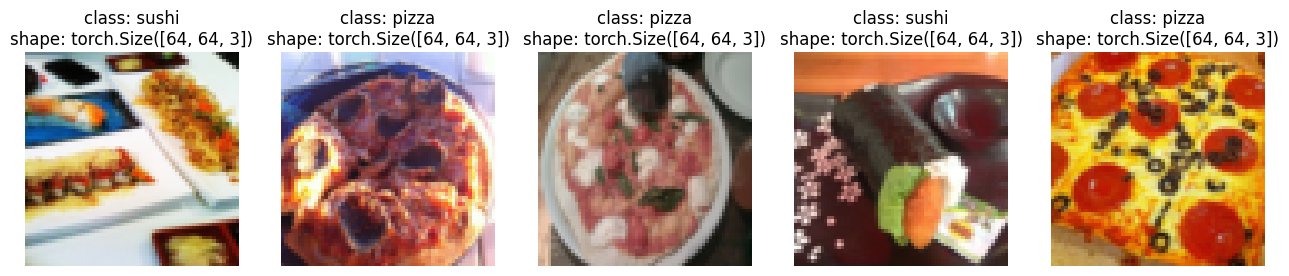

In [42]:
#view random images from ImageFolder created Dataset
display_random_images(
    train_data,
    n=5,
    classes=class_names,
    seed=42
)

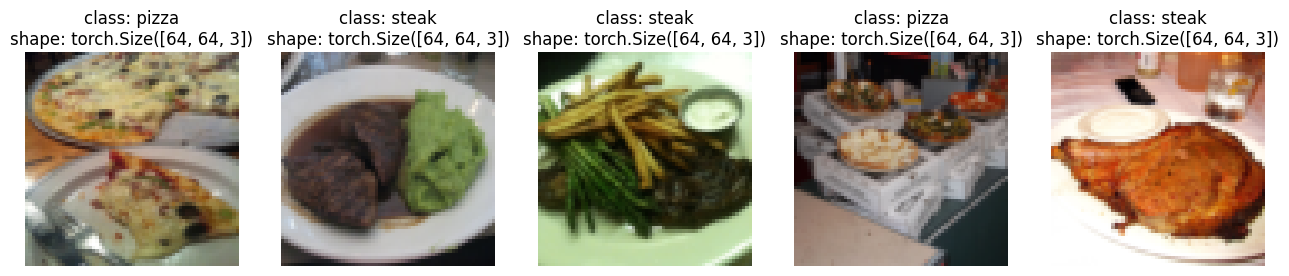

In [43]:
# view random images from ImageFolder Custom
display_random_images(
    train_data_custom,
    n=5,
    classes=class_names,
    seed=42
)

### 5.4 Turn custom loaded images into `DataLoaders`

In [44]:
from torch.utils.data import DataLoader

train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size=1,
    num_workers=0,
    shuffle=True
)
test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=1,
    num_workers=0,
    shuffle=False
)
train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x7f62a0059c30>,
 <torch.utils.data.dataloader.DataLoader at 0x7f62a005ada0>)

In [45]:
len(train_dataloader_custom)

225

In [46]:
# get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

print(f" Image shape: {img_custom.shape}")
print(f" Label shape: {label_custom.shape}")

 Image shape: torch.Size([1, 3, 64, 64])
 Label shape: torch.Size([1])


## 6. Other forms of  Transforms (data augmentation)
Data augmentation - `torch.vision.transforms`
Transforms alter images in some way and that it increases the diversity of your training set improving a model's generalization.


In [47]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

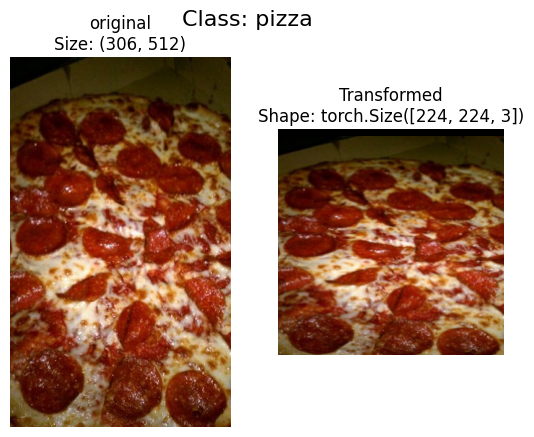

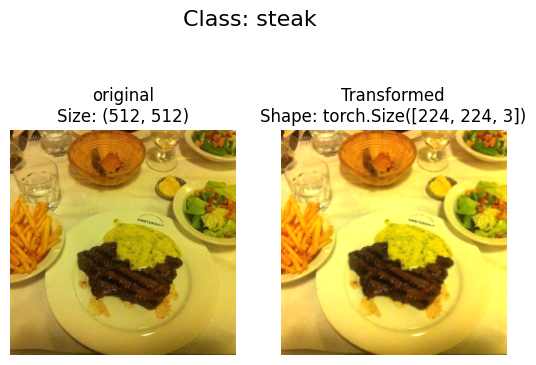

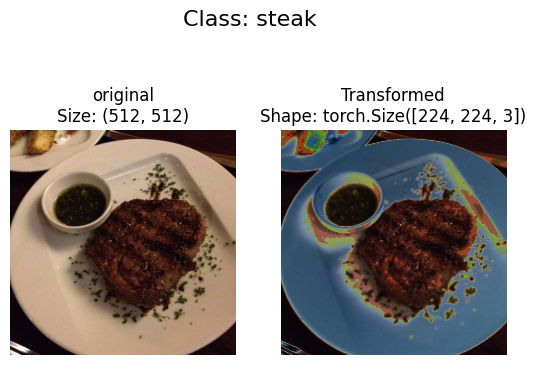

In [48]:
# lets test our data augmentation out
image_path_list = list(image_path.glob("*/*/*.jpg"))

#plot random images
plot_transformed_image(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=42
)

## 7. Model 0: TinyVGG without data augmentation

### 7.1 Creating a transforms and loading data for Model 0

In [49]:
# Create a simple transforms
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

Next
1. Load the data, turning the training set and test set into a `Dataset` using `torchvision.datasets.ImageFolder`
2. Converting the dataset into `DataLoaders` using `torch.utils.data.DataLoader`


In [50]:
#load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                transform=simple_transform)

# create a dataloader
import os
from torch.utils.data import DataLoader

#set up batch size and num of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating Dataloader with a batch size of {BATCH_SIZE} and {NUM_WORKERS} workers")

# Create a dataloader
train_dataloader_simple = DataLoader(
    train_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)
test_dataloader_simple = DataLoader(
    train_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)
train_dataloader_simple, test_dataloader_simple

Creating Dataloader with a batch size of 32 and 2 workers


(<torch.utils.data.dataloader.DataLoader at 0x7f629ffef700>,
 <torch.utils.data.dataloader.DataLoader at 0x7f629ff914b0>)

### 7.2 Recreate the TinyVGG model class

In [51]:
import torch.nn as nn


class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(
                      kernel_size=2,
                      stride=2),

        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(
                      kernel_size=2,
                      stride=2),

        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x:torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [52]:
# set u

In [53]:
# Instanciate the model
torch.manual_seed(42)
model_0 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data.classes)
).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3 Try Forward pass on a single image to test the model

1. Get a batch of images and the labels from the DataLoader
2. Get a single image from the batch and unsqueeze so it has a batch size of one
3. Perform inference on a single image
4. Print out whats happening
5. Convert the models raw logits to prediction probabilities using `torch.Softmax()` and the pred probs to prediction lables using `torch.argmax()`

In [54]:
# 1. get a batch of images from the dataloader
img_batch , label_batch = next(iter(train_dataloader_simple))

# 2.Get a single image from the batch and unsqueeze so it has a batch size of one
img_single , label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}" )

# 3. Perform inference on a single image
model_0.eval()
with torch.inference_mode():
  pred_logits = model_0(img_single)



# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred_logits}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred_logits, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred_logits, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")


Single image shape: torch.Size([1, 3, 64, 64])
Output logits:
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
2


### 7.4 Use `Torchinfo` to get an idea of the shapes going through our model

In [56]:
try:

  import torchinfo


except:
  ! pip install torchinfo
  torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 Create train & test loop functions
* `train_step()`
*  `test_step()`

In [57]:
# train_step function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer ):

  # put model in train mode
  model.train()

  # set up train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # loop thru data loader data batches
  for batch, (X, y) in enumerate(dataloader):

    # send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    #calculate and accumulate accuracy metrics across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # adjust metrics to average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [58]:
# test_step function
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module ):

   #set up model in eval mode
   model.eval()

   # set up test loss and test accuracy values
   test_loss, test_acc = 0,0

   # turn on torch.inference mode context manager
   with torch.inference_mode():
    #loop thru dataloader batches
    for batch, (X, y) in enumerate (dataloader):
      # set data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. calculate loss and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      #calculate an accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

   # adjust metrics to get average loss and accuracy per batch
   test_loss = test_loss / len(dataloader)
   test_acc = test_acc / len(dataloader)
   return test_loss, test_acc

### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

In [59]:
from tqdm.auto import tqdm

# take in various parameters required for training and test steps
def train(
     model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5
 ):

    # Create an empty results dictionary
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # loop thru training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
      train_loss , train_acc  = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer )
      test_loss , test_acc = test_step(model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn

      )

      #print out what's happening
      print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
       # 5. Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

      # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and evaluate Model 0


In [60]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1129 | test_acc: 0.3047
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1243 | test_acc: 0.2930
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1281 | test_acc: 0.2930
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1115 | test_acc: 0.2930
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1153 | test_acc: 0.2930
Total training time: 14.880 seconds


### 7.8 Plot the loss curve of model 0

In [61]:
model_0_results

{'train_loss': [1.1078356951475143,
  1.0846453607082367,
  1.115261048078537,
  1.0990152657032013,
  1.098965361714363],
 'train_acc': [0.2578125, 0.42578125, 0.29296875, 0.2890625, 0.29296875],
 'test_loss': [1.1129125356674194,
  1.1243267506361008,
  1.1281480342149734,
  1.1115055829286575,
  1.115347295999527],
 'test_acc': [0.3046875, 0.29296875, 0.29296875, 0.29296875, 0.29296875]}

In [62]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [63]:
def plot_loss_curves(results: Dict[str, List[float]]):
   """ plots training curves of a results dictionary"""
   # Get the loss values of the results dictionary(training and test)
   loss = results["train_loss"]
   test_loss = results["test_loss"]

   # Get accuracy values from the results dictionary (training and test)
   accuracy = results["train_acc"]
   test_accuracy = results["test_acc"]

   # Figure out how many epochs there were
   epochs = range(len(results["train_loss"]))

   # set up a plot
   plt.figure(figsize=(15,7))

   # plot the loss
   plt.subplot(1,2,1)
   plt.plot(epochs, loss, label="train_loss")
   plt.plot(epochs, test_loss, label="test_loss")
   plt.title("Loss")
   plt.xlabel("Epochs")
   plt.legend()

   # Plot the accuracy
   plt.subplot(1,2,2)
   plt.plot(epochs, accuracy, label="train_acc")
   plt.plot(epochs, test_accuracy, label="test_acc")
   plt.title("Accuracy")
   plt.xlabel("Epochs")
   plt.legend()



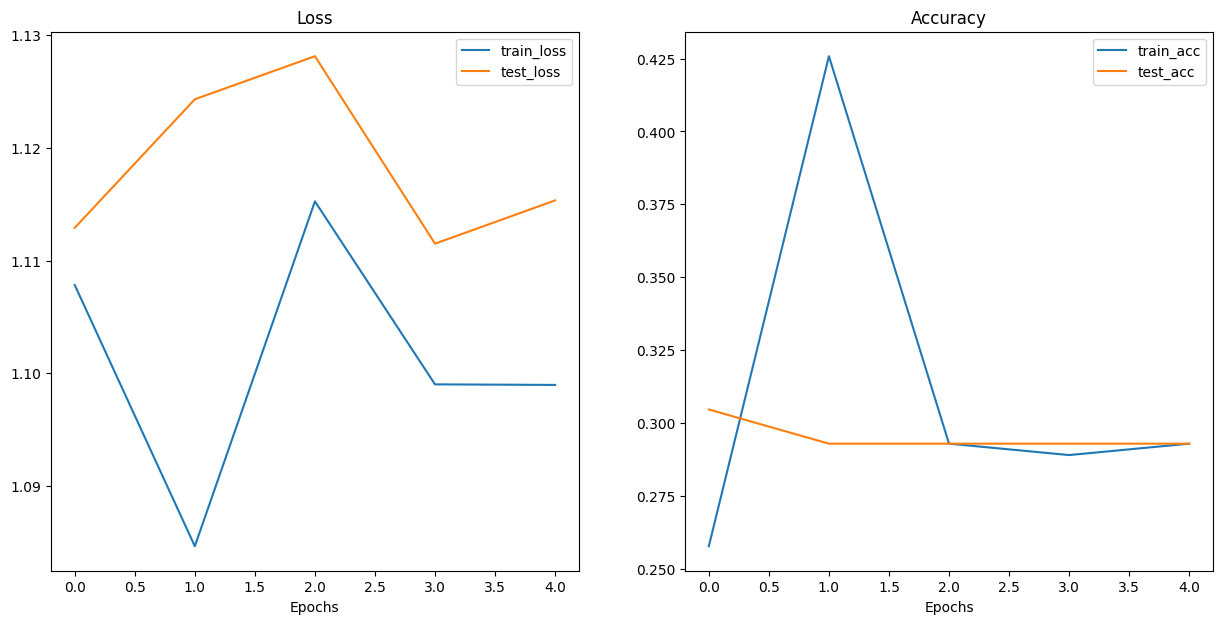

In [64]:
plot_loss_curves(model_0_results)

## 8. TinyVGG with Data Augmentation
transforms.TrivialAugmentWide()


### 8.1 Create transform with data augmentation

In [66]:

train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

#create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

### 8.2 Create train and test `Dataset` and `Dataloaders`

In [67]:
# turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ))

In [71]:
# Turn datasets into Dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader = DataLoader(test_data_simple,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)
train_dataloader_augmented , test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f628bd1ea40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f628bd1e410>)

### 8.3 Construct and train Model 1

In [72]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [73]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1015 | test_acc: 0.3047
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1201 | test_acc: 0.3047
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1392 | test_acc: 0.3047
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 1.1312 | test_acc: 0.3047
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 1.1179 | test_acc: 0.3047
Total training time: 17.313 seconds


### 8.4 Plot the loss curves for Model 1

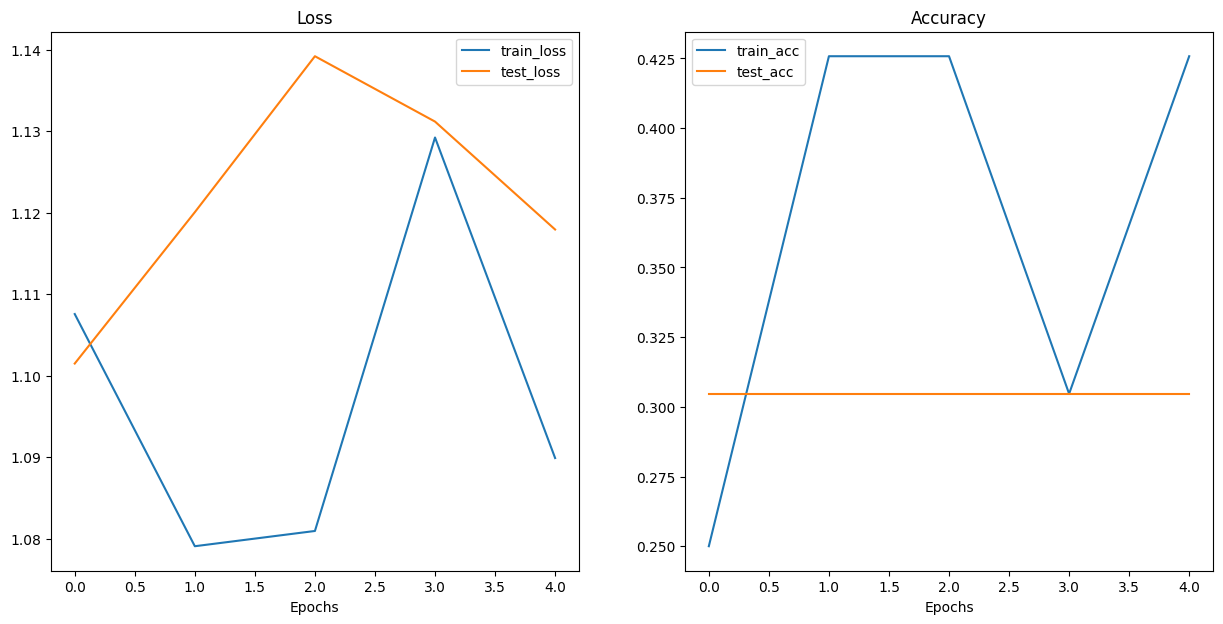

In [74]:
plot_loss_curves(model_1_results)

## 9. Compare Model results

In [76]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.107836   0.257812   1.112913  0.304688
1    1.084645   0.425781   1.124327  0.292969
2    1.115261   0.292969   1.128148  0.292969
3    1.099015   0.289062   1.111506  0.292969
4    1.098965   0.292969   1.115347  0.292969

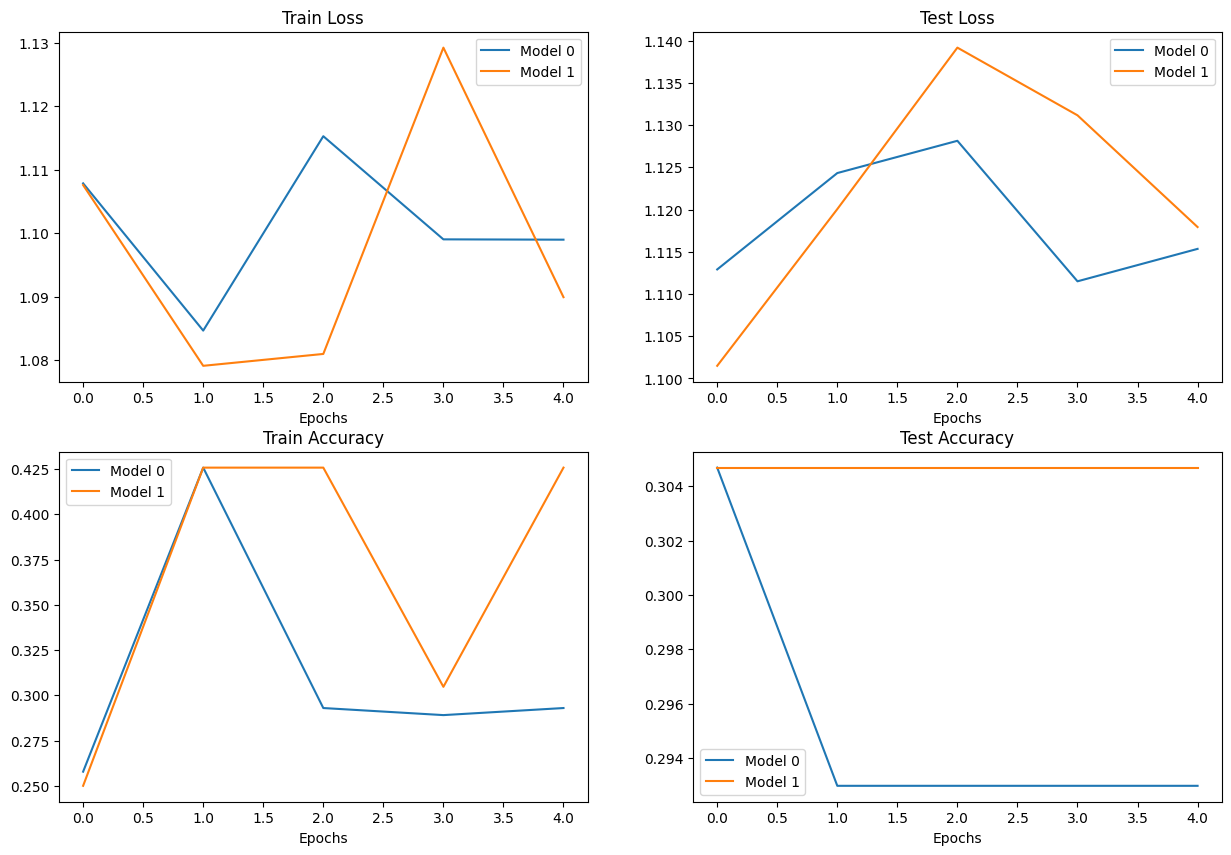

In [77]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## 10 Make a prediction with a custom image
To do so, we can load an image and then preprocess it in a way that matches the type of data our model was trained on.

In other words, we'll have to convert our own custom image to a tensor and make sure it's in the right datatype before passing it to our model.

Let's start by downloading a custom image.

In [78]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

### 10.1 Loading a custom image with PyTorch

To load an image we'll use `torchvision.io.read_image()`

This method will read a JPEG or PNG image and turn it into a 3 dimensional RGB or grayscale torch.Tensor with values of datatype uint8 in range [0, 255].

In [81]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8
# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [82]:
# Try to make a prediction on image in uint8 format (this will error)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [83]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

### 10.2 Predicting on custom images with a trained PyTorch model

Our model was trained on images with shape [3, 64, 64], whereas our custom image is currently [3, 4032, 3024]

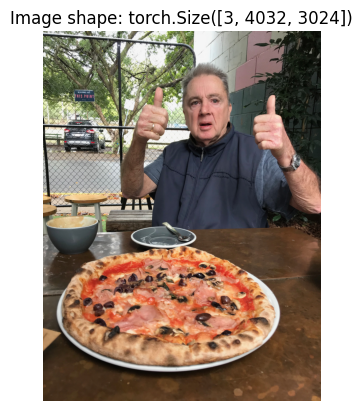

In [84]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [85]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [86]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [87]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

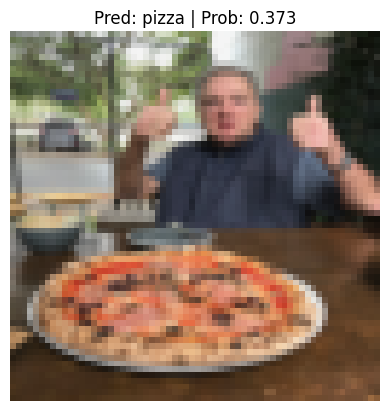

In [88]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)